<a href="https://colab.research.google.com/github/tanvi876/ML-Lab/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Loading and Preparing Data ---
Data Shapes -> Train: (100, 6), Val: (30, 6), Test: (29, 6)

--- Generating Scatter Plots (Source 8) ---


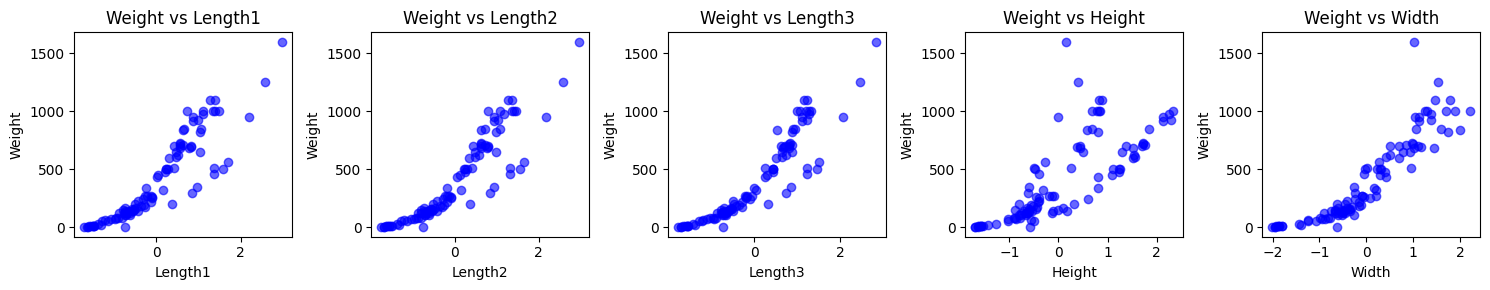


--- Training Model & Analysis ---
Final Training MSE: 14393.70
Final Test MSE:     12223.30
Optimal Parameters: [402.98690421 118.61569419  69.69864453   7.35047503  65.12512764
  93.3596133 ]


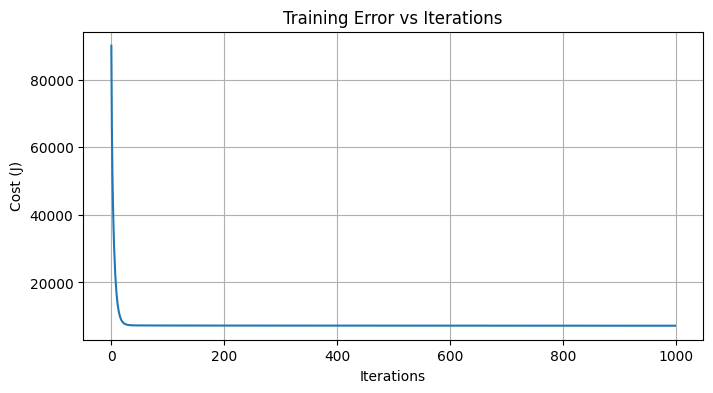

Generating Loss Surface Plot...


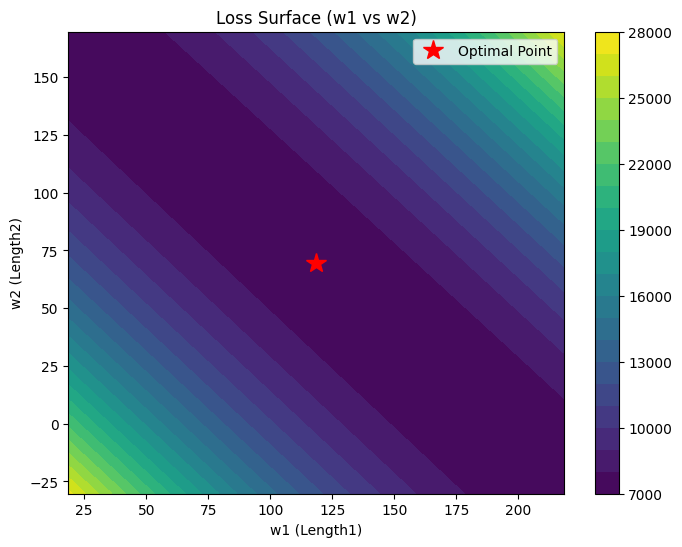


--- Comparing Different Initializations (Source 14) ---


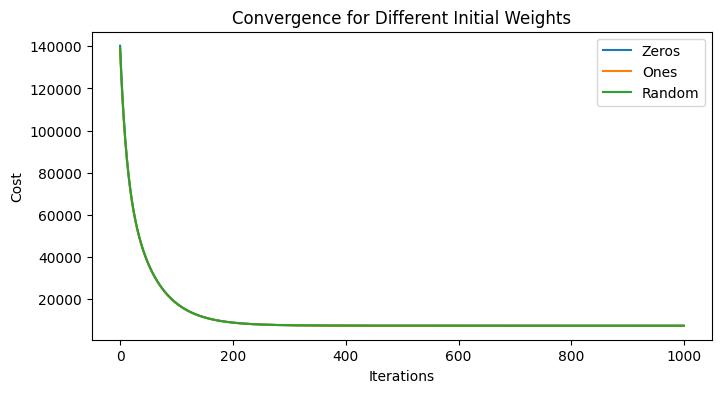


--- Hyperparameter Tuning (Sources 15-17) ---
LR         | Val MSE   
-------------------------
0.3        | 21770.78  
0.1        | 21569.19  
0.03       | 21482.78  
0.01       | 21341.69  
0.001      | 44775.54  
-------------------------
Best Learning Rate Found: 0.01

Test MSE without tuning (lr=0.001): 26182.10
Test MSE with tuning    (lr=0.01): 12480.83

Final Optimal Parameters (Weights):
Bias: 403.0745
Length1: 74.2970
Length2: 69.8127
Length3: 59.3403
Height: 60.3165
Width: 88.6941


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("--- Loading and Preparing Data ---")

try:
    df = pd.read_csv('Fish.csv')
except FileNotFoundError:
    print("ERROR: Please upload 'Fish.csv' to Colab files!")

Y_raw = df.iloc[:, 1].values

X_raw = df.iloc[:, 2:].values

np.random.seed(42)

indices = np.arange(X_raw.shape[0])
np.random.shuffle(indices)
X_shuffled = X_raw[indices]
Y_shuffled = Y_raw[indices]

mu = np.mean(X_shuffled, axis=0)
sigma = np.std(X_shuffled, axis=0)
X_norm = (X_shuffled - mu) / sigma

m = len(Y_shuffled)
X_ready = np.c_[np.ones(m), X_norm]

X_train, Y_train = X_ready[:100], Y_shuffled[:100]

X_val, Y_val = X_ready[100:130], Y_shuffled[100:130]

X_test, Y_test = X_ready[130:], Y_shuffled[130:]

print(f"Data Shapes -> Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

print("\n--- Generating Scatter Plots (Source 8) ---")
feature_names = df.columns[2:]
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)

    plt.scatter(X_train[:, i+1], Y_train, alpha=0.6, color='blue')
    plt.title(f"Weight vs {feature_names[i]}")
    plt.xlabel(feature_names[i])
    plt.ylabel("Weight")
plt.tight_layout()
plt.show()

def compute_cost(X, y, w):
    """Calculates Mean Squared Error"""
    m = len(y)
    predictions = np.dot(X, w)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

def gradient_descent(X, y, learning_rate, iterations, initial_w=None):
    """Performs Gradient Descent Optimization"""
    m = len(y)

    if initial_w is None:
        w = np.zeros(X.shape[1])
    else:
        w = np.copy(initial_w)

    cost_history = []

    for i in range(iterations):

        y_pred = np.dot(X, w)

        error = y_pred - y

        gradient = (1/m) * np.dot(X.T, error)
        w = w - (learning_rate * gradient)

        cost_history.append(compute_cost(X, y, w))

    return w, cost_history

print("\n--- Training Model & Analysis ---")

lr = 0.1
iterations = 1000
w_final, cost_history = gradient_descent(X_train, Y_train, lr, iterations)

train_mse = compute_cost(X_train, Y_train, w_final) * 2

test_mse = compute_cost(X_test, Y_test, w_final) * 2
print(f"Final Training MSE: {train_mse:.2f}")
print(f"Final Test MSE:     {test_mse:.2f}")
print(f"Optimal Parameters: {w_final}")

plt.figure(figsize=(8, 4))
plt.plot(cost_history)
plt.title("Training Error vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.grid(True)
plt.show()

print("Generating Loss Surface Plot...")
w1_range = np.linspace(w_final[1]-100, w_final[1]+100, 50)

w2_range = np.linspace(w_final[2]-100, w_final[2]+100, 50)

W1, W2 = np.meshgrid(w1_range, w2_range)
Z = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        w_temp = w_final.copy()
        w_temp[1] = W1[i, j]
        w_temp[2] = W2[i, j]
        Z[i, j] = compute_cost(X_train, Y_train, w_temp)

plt.figure(figsize=(8, 6))
cp = plt.contourf(W1, W2, Z, levels=20, cmap='viridis')
plt.colorbar(cp)
plt.title("Loss Surface (w1 vs w2)")
plt.xlabel("w1 (Length1)")
plt.ylabel("w2 (Length2)")
plt.plot(w_final[1], w_final[2], 'r*', markersize=15, label='Optimal Point')
plt.legend()
plt.show()

print("\n--- Comparing Different Initializations (Source 14) ---")
inits = [np.zeros(X_train.shape[1]), np.ones(X_train.shape[1]), np.random.randn(X_train.shape[1])]
labels = ["Zeros", "Ones", "Random"]

plt.figure(figsize=(8, 4))
for i, init_w in enumerate(inits):
    _, costs = gradient_descent(X_train, Y_train, 0.01, 1000, initial_w=init_w)
    plt.plot(costs, label=labels[i])
plt.legend()
plt.title("Convergence for Different Initial Weights")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

print("\n--- Hyperparameter Tuning (Sources 15-17) ---")

learning_rates = [0.3, 0.1, 0.03, 0.01, 0.001]
best_lr = None
min_val_cost = float('inf')
results = {}

print(f"{'LR':<10} | {'Val MSE':<10}")
print("-" * 25)

for lr in learning_rates:

    w_tuned, _ = gradient_descent(X_train, Y_train, lr, iterations=1000)

    val_cost = compute_cost(X_val, Y_val, w_tuned) * 2

    print(f"{lr:<10} | {val_cost:<10.2f}")

    if val_cost < min_val_cost:
        min_val_cost = val_cost
        best_lr = lr
        best_w_tuned = w_tuned

print("-" * 25)
print(f"Best Learning Rate Found: {best_lr}")

w_untuned, _ = gradient_descent(X_train, Y_train, 0.001, 1000)
mse_untuned = compute_cost(X_test, Y_test, w_untuned) * 2

mse_tuned = compute_cost(X_test, Y_test, best_w_tuned) * 2

print(f"\nTest MSE without tuning (lr=0.001): {mse_untuned:.2f}")
print(f"Test MSE with tuning    (lr={best_lr}): {mse_tuned:.2f}")

print("\nFinal Optimal Parameters (Weights):")
feature_map = ['Bias'] + list(feature_names)
for i, name in enumerate(feature_map):
    print(f"{name}: {best_w_tuned[i]:.4f}")